<a href="https://colab.research.google.com/github/SpellOnYou/10000-days-of-code/blob/master/assignment2/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Naive Bayes and Text Classification

Only use the already imported library `numpy`. Make sure that the `liar.txt` dataset is in the same directory as the notebook.

List your team members (name and immatriculation number) in the following cell:

* *Fabia Bayer, 3130760, M.Sc. Technische Kybernetik*
* *Tobias Ziegler, 3257258, M.Sc. Technische Kybernetik.*
* *Jiwon Kim, 3567919, M.Sc. Computational Linguistics*


In [1]:
# Load required packages and dataset. Do not modify.
import numpy as np


def load_liar_dataset():
    import string
    
    with open('liar.txt', mode='r', encoding='utf-8') as f:
        rows = [l.strip().split('\t')[:2] for l in f]
    
    y, X = zip(*rows)
    X =[x.translate(str.maketrans('', '', string.punctuation)).lower().split() for x in X]
    
    return X, y
    

X, y = load_liar_dataset()

print('Sample:')
print(f'{y[0]}: {X[0]}')
print(f'{y[2]}: {X[2]}')

Sample:
real: ['thanks', 'to', 'our', 'reforms', 'the', 'average', 'family', 'will', 'have', 'an', 'extra', '322', 'to', 'spend']
real: ['winning', 'enough', 'pledged', 'delegates', 'is', 'not', 'impossible']


## Task 2: Fake News Classification with Naive Bayes

Implement a Naive Bayes classifier with Laplace smoothing to detect whether a text message is fake or real (not fake).

A text message is represented by a list of string tokens as shown above.
The classification target is binary and the two possible labels are the strings `'fake'` and `'real'`.

Fill out the methods in `NaiveBayesFakeNewsClassifier` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed.

Hint: Try to map the text messages to word frequency vectors by counting how often each word occurs in a message.

In [2]:
# Implement your solution here.
class NaiveBayesFakeNewsClassifier(object):
    def __init__(self):
        pass

    def _count(self, ls):
        """
        get list composed of tokens and return word count dict
        """
        
        d = {}
        for token in ls:
            if token in d.keys(): d[token] +=1
            else: d[token] = 1

        return d        

    def _word_freq(self):
        """
        Returns
        ---
        (d1, d2)
        d1(dict): word freq dict 'real' label
        d2(dict): word freq dict 'fake' label
        """
        ls_real, ls_fake = [], [] #initialize empty list for each label
        
        #split docs using label and append unpacked string sequence
        for doc, c in zip(self.x, self.y):
            if c == 'real':
                ls_real += doc
            else: ls_fake += doc

        self.tot_wc = len(set(ls_real + ls_fake)) #save total word count for smoothing
         
        return self._count(ls_real), self._count(ls_fake)

        #funciton which initialize real, fake probability for each text
    def _prob_init(self):
        self.real_p = 1
        self.fake_p = 1

    #probability with laplace smoothing / return probability for p(token|label)
    def _laplace_p(self, token):
        
        #count token frequency in label, if else assign 0
        real_cnt = self.real_freq.get(token) if token in self.real_freq.keys() else 0
        real_p = (real_cnt+1)/(self.real_wc + self.tot_wc) #smoothing

        fake_cnt = self.fake_freq.get(token) if token in self.fake_freq.keys() else 0
        fake_p = (fake_cnt+1)/(self.fake_wc + self.tot_wc)        
        return real_p, fake_p

    def fit(self, X, y):
        """
        X is a list of `n` text messages. Each text message is a list of strings with at least length one.
        y is a list of `n` labels either the string 'fake' or the string 'real'.
        """
        self.x, self.y = map(lambda x: np.array(x, dtype='object'),(X, y)) #assign np array to make slicing easy
        self.real_freq, self.fake_freq = self._word_freq() #word probability in class real

        self.real_wc = len(self.real_freq.keys()) # unique words count in real clas
        self.fake_wc = len(self.fake_freq.keys()) # unique words count in fake clas


        pass

    def predict(self, X):
        """
        X is a list of `n` text messages. Each text message is a list of strings with at least length one.
        The method returns a list of `n` strings, i.e. classification labels ('fake' or 'real').
        """
        pred = [] #predict resultss

        #iterate X
        for text in X:
            self._prob_init() #initialize probabilty for each label 
            for token in text:
                # probability whether real/fake
                wd_real_p, wd_fake_p = self._laplace_p(token)
                self.real_p *= wd_real_p
                self.fake_p *= wd_fake_p
            guess = 'real' if self.real_p > self.fake_p else 'fake'
            # if guess == 'fake': print('yes')
            pred.append(guess)

        return pred


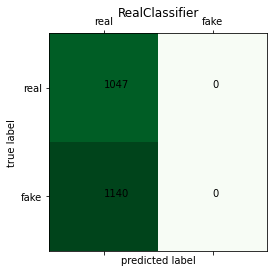

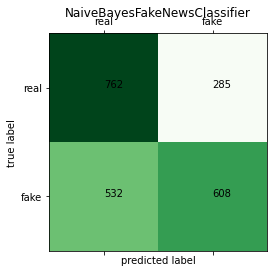

In [4]:
# The following code will evaluate your classifier.
class RealClassifier(object):
    """
    This classifier is a primitive baseline, which just predicts the most common class each time.
    Naive Bayes should definitely beat this.
    """
    def fit(self, X, y): pass
    def predict(self, X): return len(X)*['real']

    
def train_evaluate(classifier, X, y):
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import train_test_split
    
    # Apply train-test split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
    # Inititialize and train classifier.
    classifier.fit(X_train, y_train)
    # Evaluate classifier on test data.
    yhat_test = classifier.predict(X_test)
    cmatrix = confusion_matrix(y_test, yhat_test, labels=['real', 'fake'])
    
    return cmatrix


def plot_confusion_matrix(cmatrix, classifier_name):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(1, 1)
    ax.matshow(cmatrix, cmap='Greens')
    for x in (0, 1):
        for y in (0, 1):
            ax.text(x, y, cmatrix[y, x])
    ax.set_xlabel('predicted label')
    ax.set_ylabel('true label')
    ax.set_xticklabels(['', 'real', 'fake'])
    ax.set_yticklabels(['', 'real', 'fake'])
    ax.set_title(classifier_name)

    
    
real_classifier = RealClassifier()
your_classifier = NaiveBayesFakeNewsClassifier()
real_cmatrix = train_evaluate(real_classifier, X, y)
your_cmatrix = train_evaluate(your_classifier, X, y)

plot_confusion_matrix(real_cmatrix, 'RealClassifier')
plot_confusion_matrix(your_cmatrix, 'NaiveBayesFakeNewsClassifier')